In [1]:
#Importing required packages 


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing data 

Data=pd.read_excel(r"C:\Users\HP\Desktop\KOMAL\DATA\Assessment (Responses).xlsx")
Data

,Name,Gender,Age,Area,Number of family members staying together?(Consider period during lockdown and mention it in figure),Occupation,Number of hours on an average you slept in the day during a lockdown?(in figures),Number of hours on an average you slept in the day before lockdown?(in figures),During lockdown how do you keep yourself fit?,Time spent per day on an average to keep yourself fit during lockdown?(in hours and in figure),...,Which activities were you pursuing before lockdown?,Time spent on an average on these activities during lockdown (per day)?,Time spent on an average on these activities before lockdown (per day)?,Which of these social networking sites do you use?,Number of hours on an average spent on these social networking sites during lockdown?,Number of hours on an average spent on these social networking sites before lockdown?,How many social media accounts do you have during lockdown?,How many social media accounts did you have before lockdown?,What are the benefits of using any social media site?,To what extent do you think this lockdown has impacted your overall well-being and learning habits (In a positive way)?
0,Shaikh Sameera Khwaja Miya,Female,18-24,Suburban,5,Student,9.0,7.0,"Exercise, Household Chores, Zumba",1.0,...,"Reading, College",2 – 3 hours,Less than 1 hour,"YouTube, WhatsApp, Instagram",3 – 4,1 – 2,3 – 4,3 – 4,"To stay connected with people, Learning new sk...",2
1,Manasi Kadam,Female,18-24,Urban,3,Student,3.0,3.0,Zumba,1.0,...,Reading,3 – 4 hours,1 – 2 hours,"YouTube, WhatsApp, Instagram",2 – 3,2 – 3,1 – 2,1 – 2,"Helps with studies, Learning new skills, Enter...",2
2,Rishikesh Golhar,Male,18-24,Urban,5,Student,7.0,7.0,Daily walk,1.0,...,Reading,1 – 2 hours,1 – 2 hours,Facebook,1 – 2,1 – 2,2 – 3,2 – 3,"To stay connected with people, Entertainment",3
3,Mohaddasah,Female,18-24,Urban,4,Student,7.0,6.0,"Household Chores, Art , Reading",4.0,...,"Reading, College, Art",1 – 2 hours,Less than 1 hour,"WhatsApp, Instagram, Twitter",Less than 1,1 – 2,2 – 3,2 – 3,"Helps with studies, To stay connected with peo...",4
4,Muntaha,Male,18-24,Rural,5,Private job,8.0,7.0,Exercise,1.0,...,...,Less than 1 hour,Less than 1 hour,"WhatsApp, Instagram",3 – 4,1 – 2,2 – 3,2 – 3,Entertainment,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Sachin parab,Male,25-34,Urban,6,Government Job,7.0,7.0,"Exercise, Daily walk",4.0,...,Other,1 – 2 hours,1 – 2 hours,"Facebook, YouTube, WhatsApp",1 – 2,1 – 2,1 – 2,1 – 2,"To stay connected with people, Learning new sk...",1
199,Raj parab,Male,25-34,Urban,5,Private job,7.0,7.0,"Exercise, Daily walk",1.0,...,"Reading, Writing",Less than 1 hour,Less than 1 hour,"Facebook, YouTube, WhatsApp, Instagram, Twitter",Less than 1,1 – 2,1 – 2,1 – 2,"To stay connected with people, Learning new sk...",1
200,Aniket parab,Male,25-34,Urban,6,Government Job,8.0,8.0,"Household Chores, Daily walk",0.0,...,No activity,Less than 1 hour,Less than 1 hour,WhatsApp,Less than 1,1 – 2,1 – 2,1 – 2,To stay connected with people,3
201,Ajay parab,Male,25-34,Urban,5,Private job,7.0,7.0,Daily walk,0.0,...,Other,Less than 1 hour,Less than 1 hour,"Facebook, YouTube, WhatsApp",Less than 1,1 – 2,2 – 3,2 – 3,"To stay connected with people, Learning new sk...",3


In [3]:
Data.shape

(203, 41)

In [4]:
Data.columns

Index(['Name', 'Gender', 'Age', 'Area',
       'Number of family members staying together?(Consider period during lockdown and mention it in figure)',
       'Occupation',
       'Number of hours on an average you slept in the day during a lockdown?(in figures) ',
       'Number of hours on an average you slept in the day before  lockdown?(in figures)',
       'During lockdown how do you keep yourself  fit?',
       'Time spent per day on an average to keep yourself fit during lockdown?(in hours and in figure)',
       'Time spent per day on an average to keep yourself fit before lockdown ?(in hours and in figure)',
       'Are you suffering from any of the following?',
       'During lockdown how frequently are you affected on an average in a week due to above condition  ?',
       'How frequently were you affected on an average in a week due to above condition                                                                                                                              

In [5]:
data=Data[["Gender",
"Age",
"Area",
"Number of family members staying together?(Consider period during lockdown and mention it in figure)",
"Occupation",
"Number of hours on an average you slept in the day during a lockdown?(in figures) ",
"During lockdown how do you keep yourself  fit?",
"Time spent per day on an average to keep yourself fit during lockdown?(in hours and in figure)",
"Number of hours spent on an average for office  work/attending online classes per day?(During lockdown)",
"On an average time spent watching a TV per day during lockdown? (in hours)",
"What type of content did you watch most on TV during lockdown ?",
"Number of hours spent on an average on mobile during lockdown(per day) ?",
"For what purpose do you use your mobile phone the most everyday?(during lockdown)",
"Did you learn any new software's/apps during lockdown? Which are they?",
"If yes, how many courses have  you completed during lockdown?",
"Which activities do you prefer to keep yourself busy during lockdown?",
"Time spent on an average on these activities during lockdown (per day)?",
"Number of hours on an average spent on these social networking sites during lockdown?",
"How many social media accounts do you have during lockdown?",
"To what extent do you think this lockdown has impacted your overall well-being and learning habits (In a positive way)?",
]]

In [6]:
data.shape

(203, 20)

In [7]:
data.columns

Index(['Gender', 'Age', 'Area',
       'Number of family members staying together?(Consider period during lockdown and mention it in figure)',
       'Occupation',
       'Number of hours on an average you slept in the day during a lockdown?(in figures) ',
       'During lockdown how do you keep yourself  fit?',
       'Time spent per day on an average to keep yourself fit during lockdown?(in hours and in figure)',
       'Number of hours spent on an average for office  work/attending online classes per day?(During lockdown)',
       'On an average time spent watching a TV per day during lockdown? (in hours)',
       'What type of content did you watch most on TV during lockdown ?',
       'Number of hours spent on an average on mobile during lockdown(per day) ?',
       'For what purpose do you use your mobile phone the most everyday?(during lockdown)',
       'Did you learn any new software's/apps during lockdown? Which are they?',
       'If yes, how many courses have  you completed

In [8]:
data=data.rename(columns={"Gender":"Gender",
"Age":"Age",
"Area":"Area",
"Number of family members staying together?(Consider period during lockdown and mention it in figure)":"family members",
"Occupation":"Occupation",
"Number of hours on an average you slept in the day during a lockdown?(in figures) ":"sleeping time",
"During lockdown how do you keep yourself  fit?":"activities for fitness",
"Time spent per day on an average to keep yourself fit during lockdown?(in hours and in figure)":"time spent for fitness",
"On an average time spent watching a TV per day during lockdown? (in hours)":"time spent on tv",
"Number of hours spent on an average on mobile during lockdown(per day) ?":"time spent on mobile",
"Number of hours spent on an average for office  work/attending online classes per day?(During lockdown)":"time spent for office work/lectures",
"What type of content did you watch most on TV during lockdown ?":"content of tv watchimg",
"For what purpose do you use your mobile phone the most everyday?(during lockdown)":"pupose of using mobile",
"Did you learn any new software's/apps during lockdown? Which are they?":"did you learn software",
"If yes, how many courses have  you completed during lockdown?":"no of courses",
"Which activities do you prefer to keep yourself busy during lockdown?":"activities to spend time",
"Time spent on an average on these activities during lockdown (per day)?":"time spent for activities",
"Number of hours on an average spent on these social networking sites during lockdown?":"time spent on SN SITES",
"How many social media accounts do you have during lockdown?":"no of social media accounts",
"To what extent do you think this lockdown has impacted your overall well-being and learning habits (In a positive way)?":"y",
})

In [9]:
data

,Gender,Age,Area,family members,Occupation,sleeping time,activities for fitness,time spent for fitness,time spent for office work/lectures,time spent on tv,content of tv watchimg,time spent on mobile,pupose of using mobile,did you learn software,no of courses,activities to spend time,time spent for activities,time spent on SN SITES,no of social media accounts,y
0,Female,18-24,Suburban,5,Student,9.0,"Exercise, Household Chores, Zumba",1.0,5.0,3-4,Daily soap/movies,4 - 5,Social networking sites,No,3,"Reading, Cooking",2 – 3 hours,3 – 4,3 – 4,2
1,Female,18-24,Urban,3,Student,3.0,Zumba,1.0,7.0,1-2,"News, Daily soap/movies, Informative",2 - 3,For reading,No,no course,"Drawing, Reading, Cooking",3 – 4 hours,2 – 3,1 – 2,2
2,Male,18-24,Urban,5,Student,7.0,Daily walk,1.0,2.0,below 1,Sports,4 - 5,Watching movies/series,No,1,Reading,1 – 2 hours,1 – 2,2 – 3,3
3,Female,18-24,Urban,4,Student,7.0,"Household Chores, Art , Reading",4.0,1.0,below 1,Informative,1 - 2,Social networking sites,Python,no course,"Reading, Art",1 – 2 hours,Less than 1,2 – 3,4
4,Male,18-24,Rural,5,Private job,8.0,Exercise,1.0,0.0,1-2,News,3 - 4,Online work,"Python, HTML",no course,Reading,Less than 1 hour,3 – 4,2 – 3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,Male,25-34,Urban,6,Government Job,7.0,"Exercise, Daily walk",4.0,12.0,below 1,Sports,1 - 2,Social networking sites,learnt nothing,no course,Other,1 – 2 hours,1 – 2,1 – 2,1
199,Male,25-34,Urban,5,Private job,7.0,"Exercise, Daily walk",1.0,8.0,below 1,"News, Sports, Informative",1 - 2,Playing games,learnt nothing,no course,Reading,Less than 1 hour,Less than 1,1 – 2,1
200,Male,25-34,Urban,6,Government Job,8.0,"Household Chores, Daily walk",0.0,12.0,Dont watch,Dont watch,less than 1,Social networking sites,learnt nothing,no course,No activity,Less than 1 hour,Less than 1,1 – 2,3
201,Male,25-34,Urban,5,Private job,7.0,Daily walk,0.0,9.0,Dont watch,Dont watch,2 - 3,Online work,learnt nothing,no course,Other,Less than 1 hour,Less than 1,2 – 3,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
Gender                                 203 non-null object
Age                                    203 non-null object
Area                                   203 non-null object
family members                         203 non-null int64
Occupation                             203 non-null object
sleeping time                          203 non-null float64
activities for fitness                 203 non-null object
time spent for fitness                 203 non-null float64
time spent for office work/lectures    203 non-null float64
time spent on tv                       203 non-null object
content of tv watchimg                 203 non-null object
time spent on mobile                   203 non-null object
pupose of using mobile                 203 non-null object
did you learn software                 203 non-null object
no of courses                          203 non-null object
activiti

In [11]:
data.columns

Index(['Gender', 'Age', 'Area', 'family members', 'Occupation',
       'sleeping time', 'activities for fitness', 'time spent for fitness',
       'time spent for office work/lectures', 'time spent on tv',
       'content of tv watchimg', 'time spent on mobile',
       'pupose of using mobile', 'did you learn software', 'no of courses',
       'activities to spend time', 'time spent for activities',
       'time spent on SN SITES', 'no of social media accounts', 'y'],
      dtype='object')

In [12]:
data.isnull().sum()

Gender                                 0
Age                                    0
Area                                   0
family members                         0
Occupation                             0
sleeping time                          0
activities for fitness                 0
time spent for fitness                 0
time spent for office work/lectures    0
time spent on tv                       0
content of tv watchimg                 0
time spent on mobile                   0
pupose of using mobile                 0
did you learn software                 0
no of courses                          0
activities to spend time               0
time spent for activities              0
time spent on SN SITES                 0
no of social media accounts            0
y                                      0
dtype: int64

In [13]:
data.corr()

,family members,sleeping time,time spent for fitness,time spent for office work/lectures,y
family members,1.000000,-0.021836,0.015357,-0.022314,0.102324
sleeping time,-0.021836,1.000000,-0.099783,0.019581,-0.065906
time spent for fitness,0.015357,-0.099783,1.000000,0.027972,0.128439
time spent for office work/lectures,-0.022314,0.019581,0.027972,1.000000,-0.033365
y,0.102324,-0.065906,0.128439,-0.033365,1.000000


In [14]:
data.corr().to_csv(r"C:\Users\HP\Desktop\KOMAL\output\data_correlation.csv")

In [15]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Occupation']= label_encoder.fit_transform(data['Occupation']) 
data['Age']= label_encoder.fit_transform(data['Age'])
data['Gender']= label_encoder.fit_transform(data['Gender']) 
data['Area']= label_encoder.fit_transform(data['Area'])
data['activities for fitness']= label_encoder.fit_transform(data['activities for fitness'])
data['time spent on tv']= label_encoder.fit_transform(data['time spent on tv'])
data['content of tv watchimg']= label_encoder.fit_transform(data['content of tv watchimg'])
data['time spent on mobile']= label_encoder.fit_transform(data['time spent on mobile'])
data['pupose of using mobile']= label_encoder.fit_transform(data['pupose of using mobile'])
data['activities to spend time']= label_encoder.fit_transform(data['activities to spend time'])
data['time spent for activities']= label_encoder.fit_transform(data['time spent for activities'])
data['time spent on SN SITES']= label_encoder.fit_transform(data['time spent on SN SITES'])
data['no of social media accounts']= label_encoder.fit_transform(data['no of social media accounts'])
data['did you learn software']= label_encoder.fit_transform(data['did you learn software'])
data['content of tv watchimg']= label_encoder.fit_transform(data['content of tv watchimg'])




In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
Gender                                 203 non-null int32
Age                                    203 non-null int32
Area                                   203 non-null int32
family members                         203 non-null int64
Occupation                             203 non-null int32
sleeping time                          203 non-null float64
activities for fitness                 203 non-null int32
time spent for fitness                 203 non-null float64
time spent for office work/lectures    203 non-null float64
time spent on tv                       203 non-null int32
content of tv watchimg                 203 non-null int64
time spent on mobile                   203 non-null int32
pupose of using mobile                 203 non-null int32
did you learn software                 203 non-null int32
no of courses                          203 non-null object
activities to spen

In [17]:
list(data.columns)

['Gender',
 'Age',
 'Area',
 'family members',
 'Occupation',
 'sleeping time',
 'activities for fitness',
 'time spent for fitness',
 'time spent for office work/lectures',
 'time spent on tv',
 'content of tv watchimg',
 'time spent on mobile',
 'pupose of using mobile',
 'did you learn software',
 'no of courses',
 'activities to spend time',
 'time spent for activities',
 'time spent on SN SITES',
 'no of social media accounts',
 'y']

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
data["y"]=np.where(data["y"]<=3,0,1)

In [21]:
y=data[['y']]


X=data.drop(['y','content of tv watchimg', 'time spent on tv','pupose of using mobile','no of courses','Age','Area','sleeping time', 'no of social media accounts','Occupation','family members','time spent on SN SITES','time spent on mobile'],axis=1)
X.head(20)

,Gender,activities for fitness,time spent for fitness,time spent for office work/lectures,did you learn software,activities to spend time,time spent for activities
0,0,18,1.0,5.0,12,32,1
1,0,48,1.0,7.0,12,12,2
2,1,1,1.0,2.0,12,30,0
3,0,24,4.0,1.0,14,31,0
4,1,7,1.0,0.0,17,30,3
5,1,7,1.0,2.0,12,30,1
6,1,10,1.0,4.0,32,0,0
7,1,34,1.0,2.0,12,39,0
8,0,8,1.0,0.0,12,39,0
9,0,0,0.0,4.0,23,5,3


In [22]:
X.columns

Index(['Gender', 'activities for fitness', 'time spent for fitness',
       'time spent for office work/lectures', 'did you learn software',
       'activities to spend time', 'time spent for activities'],
      dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [24]:
X_train.shape

(142, 7)

In [25]:
X_test.shape

(61, 7)

In [26]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Measure accuracy of our model

In [27]:
model.score(X_test, y_test)

0.819672131147541

# Confusion Matrix

In [28]:

y_predicted = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm


array([[48,  0],
       [11,  2]], dtype=int64)

Text(69.0, 0.5, 'Truth')

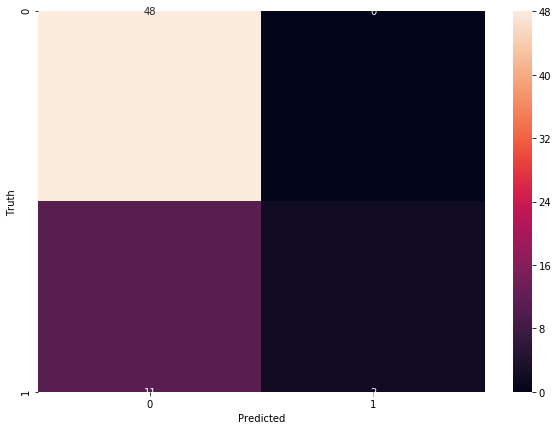

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
model = sm.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.560443
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.04658
Time:                        16:57:10   Log-Likelihood:                -79.583
converged:                       True   LL-Null:                       -83.471
Covariance Type:            nonrobust   LLR p-value:                    0.2549
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Gender                                  0.6023      0.422      1.427      0.153      -0.225       1.429
activities for fitness                  0.0144      0.014      0.997      0.319      -0.014       0.043
time spent for fitness                  0.0372      0.064      0.580      0.562      -0.088       0.163
time spent for office work/lectures    -0.0986      0.062     -1.600      0.110      -0.219       0.022
did you learn software                 -0.0211      0.014     -1.537      0.124      -0.048       0.006
activities to spend time               -0.0324      0.014     -2.344      0.019      -0.059      -0.005
time spent for activities               0.0088      0.139      0.063      0.950      -0.263       0.281
=======================================================================================================
"""